#   필요모듈 임포트 및 폰트 설정

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

# 데이터 전처리 (Preprocessing)

## 법정동 코드 가공

In [3]:
locCode1 = pd.read_excel('../data/법정동코드.xlsx')
locCode1.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN


In [4]:
#읍면동이 NaN인 데이터 추출 > 읍면동 제외
locCode1 = locCode1[locCode1.읍면동명.isnull()]
locCode1.head()
# locCode[locCode['읍면동명'].isnull()]
# locCode.drop(['읍면동명'],axis=1)
# locCode


,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
89,1114000000,서울특별시,중구,NaN,NaN,19880423,NaN
164,1117000000,서울특별시,용산구,NaN,NaN,19880423,NaN
201,1120000000,서울특별시,성동구,NaN,NaN,19880423,NaN


In [5]:
# 시군구가 NaN이 아닌 데이터 추출 > 시도명 제외
locCode2 = locCode1[locCode1.시군구명.notnull()]
locCode2.head()


,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
89,1114000000,서울특별시,중구,NaN,NaN,19880423,NaN
164,1117000000,서울특별시,용산구,NaN,NaN,19880423,NaN
201,1120000000,서울특별시,성동구,NaN,NaN,19880423,NaN
219,1121500000,서울특별시,광진구,NaN,NaN,19950301,NaN


In [6]:
# 법정동 코드 컬럼에서 5자리 추출합니다.
# 예) 서울특별시 종로구 > 11000

# for문 활용
# col1 = [str(t)[:5] for t in locCode['법정동코드']]
# locCode['법정동코드'] = locCode['법정동코드'].astype('str')
# col1 = locCode['법정동코드'].str[:5]
# locCode['지역코드'] = col1
# locCode.head()


# 빨간색 보임 !!
# loc2['법정동코드']=loc2['법정동코드'].astype('str')
# loc2['지역코드']= loc2['법정동코드'].str[:5]
# loc2.head()


locCode3 = locCode2.astype({'법정동코드':'str'})
locCode3["지역코드"] = locCode3["법정동코드"].str[:5]
locCode3.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자,지역코드
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN,11110
89,1114000000,서울특별시,중구,NaN,NaN,19880423,NaN,11140
164,1117000000,서울특별시,용산구,NaN,NaN,19880423,NaN,11170
201,1120000000,서울특별시,성동구,NaN,NaN,19880423,NaN,11200
219,1121500000,서울특별시,광진구,NaN,NaN,19950301,NaN,11215


In [7]:
# 시도명이 서울특별시인 데이터만 추출 후 시도명, 시군구명, 지역코드 컬럼만 추출 
idx = locCode3[locCode3['시도명'] == '서울특별시'].index
loc1 = locCode3[['시도명','시군구명','지역코드']].loc[idx]
loc1

,시도명,시군구명,지역코드
1,서울특별시,종로구,11110
89,서울특별시,중구,11140
164,서울특별시,용산구,11170
201,서울특별시,성동구,11200
219,서울특별시,광진구,11215
227,서울특별시,동대문구,11230
238,서울특별시,중랑구,11260
245,서울특별시,성북구,11290
285,서울특별시,강북구,11305
290,서울특별시,도봉구,11320


### 2020년 데이터를 위한 새로운 locCode2 생성

In [8]:
# 2020년 데이터를 위한 새로운 locCode2 생성
locCode2 = pd.read_excel('../data/법정동코드.xlsx')

In [9]:
# 서울특별시 데이터만을 사용할거기에 '시도명'에 서울특별시만 남기고 삭제
locCode2 = locCode2[locCode2['시도명'] == '서울특별시']
locCode2.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN


In [10]:
# 읍명동명이 NaN이 아닌 데이터만 추출

locCode2 = locCode2[locCode2['읍면동명'].notnull()]

# 또한 읍명동명 -> 법정동명으로 변경
locCode2.rename(columns={'읍면동명' : '법정동명'}, inplace=True)

# 시도명, 시군구명, 법정동명만 추출
loc2 = locCode2[['시도명', '시군구명', '법정동명']]
loc2

,시도명,시군구명,법정동명
2,서울특별시,종로구,청운동
3,서울특별시,종로구,신교동
4,서울특별시,종로구,궁정동
5,서울특별시,종로구,효자동
6,서울특별시,종로구,창성동
...,...,...,...
488,서울특별시,강동구,둔촌동
489,서울특별시,강동구,암사동
490,서울특별시,강동구,성내동
491,서울특별시,강동구,천호동


## 실거래가 데이터 가공

### 2019년도 서울 아파트 실거래가 데이터

In [11]:
# 실거래가 데이터 불러오기
apt1 = pd.read_csv('../data/2019년 서울 아파트 실거래가.csv', encoding='cp949')

apt1.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번
0,2008,2019,1,7,사직동,"105,000",광화문풍림스페이스본(101동~105동),97.61,11110,10,9
1,2008,2019,1,11,사직동,"162,000",광화문풍림스페이스본(106동),163.33,11110,11,9-1
2,2008,2019,1,19,사직동,"119,000",광화문풍림스페이스본(101동~105동),131.44,11110,13,9
3,2008,2019,1,30,사직동,"119,000",광화문풍림스페이스본(101동~105동),147.31,11110,1,9
4,2004,2019,1,25,내수동,"160,000",경희궁의아침4단지,150.48,11110,14,73


In [12]:
# 데이터 프레임의 컬럼을 확인합니다.
apt1.columns

Index(['건축년도', '거래년도', '거래월', '거래일자', '법정동', '거래금액', '아파트이름', '전용면적', '지역코드',
       '층', '지번'],
      dtype='object')

In [13]:
# 데이터 프레임의 크기(차원)을 조회합니다
apt1.shape

(68864, 11)

In [14]:
# 불러온 데이터에 NA값이 있는지 조회합니다.
apt1.isnull().sum()

건축년도     0
거래년도     0
거래월      0
거래일자     0
법정동      0
거래금액     0
아파트이름    0
전용면적     0
지역코드     0
층        0
지번       0
dtype: int64

In [15]:
# 실거래가 데이터프레임 정보 조회
apt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68864 entries, 0 to 68863
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   건축년도    68864 non-null  int64  
 1   거래년도    68864 non-null  int64  
 2   거래월     68864 non-null  int64  
 3   거래일자    68864 non-null  int64  
 4   법정동     68864 non-null  object 
 5   거래금액    68864 non-null  object 
 6   아파트이름   68864 non-null  object 
 7   전용면적    68864 non-null  float64
 8   지역코드    68864 non-null  int64  
 9   층       68864 non-null  int64  
 10  지번      68864 non-null  object 
dtypes: float64(1), int64(6), object(4)
memory usage: 5.8+ MB


In [16]:
# 거래금액 컬럼의 콤마(,) 제거 후 데이터 타입 변경
apt1['거래금액'] = [v+k for v,k in apt1['거래금액'].str.split(',')]
apt1['거래금액'] = apt1['거래금액'].astype('int64')
apt1.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73


In [17]:
# 실거래가 데이터프레임 정보 조회 (거래금액 컬럼 변경 확인)
apt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68864 entries, 0 to 68863
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   건축년도    68864 non-null  int64  
 1   거래년도    68864 non-null  int64  
 2   거래월     68864 non-null  int64  
 3   거래일자    68864 non-null  int64  
 4   법정동     68864 non-null  object 
 5   거래금액    68864 non-null  int64  
 6   아파트이름   68864 non-null  object 
 7   전용면적    68864 non-null  float64
 8   지역코드    68864 non-null  int64  
 9   층       68864 non-null  int64  
 10  지번      68864 non-null  object 
dtypes: float64(1), int64(7), object(3)
memory usage: 5.8+ MB


In [18]:
# 전용면적(제곱미터)를 평으로 변환(나누기 3.306)하여 전용면적(평) 컬럼 생성 후 소숫점 둘쨰자리까지 표시합니다.
apt1['전용면적(평)'] = round(apt1['전용면적'] / 3.306, 2)
apt1.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평)
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52


In [19]:
# 전용면적을 범주화 하기 위해 전용면적(평) 컬럼을 정수형으로 바꾼 새로운 컬럼을 생성합니다.
apt1['전용면적(평)2'] = np.trunc(apt1['전용면적(평)'])
apt1['전용면적(평)2'] = apt1['전용면적(평)2'].astype('int64')
# apt1['전용면적(평)2'] = [int(t) for t in apt2['전용면적(평)']]
apt1.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45


In [20]:
# 아래의 코드를 실행하여 전용면적을 범주화 합니다.
daterange = np.arange(0,(int(max(apt1['전용면적(평)2']) / 5) + 2) * 5, 5)
apt1['전용면적(평)3'] = pd.cut(apt1['전용면적(평)2'], daterange)
apt1.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]"
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]"
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]"
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]"
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]"


In [21]:
# 범주화된 전용면적의 고유값을 확인합니다.
apt1['전용면적(평)3'].unique()

[(25, 30], (45, 50], (35, 40], (40, 45], (0, 5], ..., (65, 70], (55, 60], (60, 65], (80, 85], (75, 80]]
Length: 17
Categories (17, interval[int64]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] ... (65, 70] < (70, 75] < (75, 80] < (80, 85]]

In [22]:
# loc 인덱서를 이용하여 거래월이 1~6인 경우 상반기, 7~12인 경우 하반기의 값을 가지는 컬럼을 생성합니다.
apt1['반기'] = np.where((apt1['거래월'] >= 1) & (apt1['거래월'] < 7), '상반기', '하반기') # 상항 연산자와 유사
apt1

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,반기
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]",상반기
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]",상반기
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]",상반기
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]",상반기
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]",상반기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11740,11,164-70,4.08,4,"(0, 5]",하반기
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695,25.57,25,"(20, 25]",하반기
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668,25.63,25,"(20, 25]",하반기
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,11740,3,686,25.66,25,"(20, 25]",하반기


In [23]:
# loc 인덱서를 이용하여 거래월이 1~3월인 경우 1분기, 4~6월인경우 2분기,
# 7~9월인경우 3분기, 10~12월인 경우 4분기의 값을 가지는 컬럼을 생성합니다.

apt1.loc[(apt1['거래월'] >= 1) & (apt1['거래월'] < 4), '분기'] = '1분기'
apt1.loc[(apt1['거래월'] >= 4) & (apt1['거래월'] < 7), '분기'] = '2분기'
apt1.loc[(apt1['거래월'] >= 7) & (apt1['거래월'] < 10), '분기'] = '3분기'
apt1.loc[(apt1['거래월'] >= 10) & (apt1['거래월'] <= 12), '분기'] = '4분기'
apt1

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,반기,분기
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]",상반기,1분기
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]",상반기,1분기
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]",상반기,1분기
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]",상반기,1분기
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]",상반기,1분기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11740,11,164-70,4.08,4,"(0, 5]",하반기,4분기
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695,25.57,25,"(20, 25]",하반기,4분기
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668,25.63,25,"(20, 25]",하반기,4분기
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,11740,3,686,25.66,25,"(20, 25]",하반기,4분기


In [24]:
# 전용면적(평)2 컬럼을 이용하여 평당 거래 금액 컬럼을 생성합니다.
apt1['평당거래금액'] = apt1['거래금액'] / apt1['전용면적(평)2']
apt1.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,반기,분기,평당거래금액
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]",상반기,1분기,3620.689655
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]",상반기,1분기,3306.122449
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]",상반기,1분기,3051.282051
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]",상반기,1분기,2704.545455
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]",상반기,1분기,3555.555556


### 2020년도 서울 아파트 실거래가 데이터

In [25]:
# 실거래가 데이터 불러오기

apt2 = pd.read_csv('../data/2020년 서울 아파트 실거래가.csv', encoding='cp949')
apt2.head()

,법정동명,건물면적,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명
0,장위동,59.92,5.0,2001,아파트,749000000,0.0,래미안 장위포레카운티
1,길음동,84.77,18.0,2001,아파트,1200000000,0.0,롯데캐슬 클라시아
2,구로동,36.90,1.0,2001,아파트,105000000,1994.0,궁전아트빌라
3,산천동,59.55,2.0,2001,아파트,830000000,2001.0,리버힐삼성
4,이촌동,64.43,5.0,2001,아파트,735000000,1971.0,강변


In [26]:
# 데이터 프레임의 컬럼을 확인합니다.
apt2.columns

Index(['법정동명', '건물면적', '층정보', '건물주용도코드', '건물주용도', '거래금액', '건축년도', '아파트명'], dtype='object')

In [27]:
# 데이터 프레임의 크기(차원)을 조회합니다

apt2.shape

(176001, 8)

In [28]:
# 불러온 데이터에 NA값이 있는지 조회합니다.

apt2.isnull().sum()

법정동명           0
건물면적           0
층정보        12163
건물주용도코드        0
건물주용도          0
거래금액           0
건축년도         565
아파트명       12163
dtype: int64

In [29]:
# 실거래가 데이터프레임 정보 조회

apt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176001 entries, 0 to 176000
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   법정동명     176001 non-null  object 
 1   건물면적     176001 non-null  float64
 2   층정보      163838 non-null  float64
 3   건물주용도코드  176001 non-null  int64  
 4   건물주용도    176001 non-null  object 
 5   거래금액     176001 non-null  int64  
 6   건축년도     175436 non-null  float64
 7   아파트명     163838 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 10.7+ MB


In [30]:
# 전용면적(제곱미터)를 평으로 변환(나누기 3.306)하여 전용면적(평) 컬럼 생성 후 소숫점 둘쨰자리까지 표시합니다.

apt2['건물면적(평)'] = round(apt2['건물면적'] / 3.306, 2)
apt2.head()

,법정동명,건물면적,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명,건물면적(평)
0,장위동,59.92,5.0,2001,아파트,749000000,0.0,래미안 장위포레카운티,18.12
1,길음동,84.77,18.0,2001,아파트,1200000000,0.0,롯데캐슬 클라시아,25.64
2,구로동,36.90,1.0,2001,아파트,105000000,1994.0,궁전아트빌라,11.16
3,산천동,59.55,2.0,2001,아파트,830000000,2001.0,리버힐삼성,18.01
4,이촌동,64.43,5.0,2001,아파트,735000000,1971.0,강변,19.49


In [31]:
apt2['건물면적(평)'].dtype

dtype('float64')

In [32]:
# 전용면적을 범주화 하기 위해 전용면적(평) 컬럼을 정수형으로 바꾼 새로운 컬럼을 생성합니다.

col2 = [int(t) for t in apt2['건물면적(평)']]
apt2['건물면적(평)2'] = col2
apt2.head()

,법정동명,건물면적,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명,건물면적(평),건물면적(평)2
0,장위동,59.92,5.0,2001,아파트,749000000,0.0,래미안 장위포레카운티,18.12,18
1,길음동,84.77,18.0,2001,아파트,1200000000,0.0,롯데캐슬 클라시아,25.64,25
2,구로동,36.90,1.0,2001,아파트,105000000,1994.0,궁전아트빌라,11.16,11
3,산천동,59.55,2.0,2001,아파트,830000000,2001.0,리버힐삼성,18.01,18
4,이촌동,64.43,5.0,2001,아파트,735000000,1971.0,강변,19.49,19


In [33]:
# 아래의 코드를 실행하여 전용면적을 범주화 합니다.
daterange = np.arange(0,(int(max(apt2['건물면적(평)2']) / 5) + 2) * 5, 5)
apt2['건물면적(평)3'] = pd.cut(apt2['건물면적(평)2'], daterange)
apt2.head()

,법정동명,건물면적,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명,건물면적(평),건물면적(평)2,건물면적(평)3
0,장위동,59.92,5.0,2001,아파트,749000000,0.0,래미안 장위포레카운티,18.12,18,"(15, 20]"
1,길음동,84.77,18.0,2001,아파트,1200000000,0.0,롯데캐슬 클라시아,25.64,25,"(20, 25]"
2,구로동,36.90,1.0,2001,아파트,105000000,1994.0,궁전아트빌라,11.16,11,"(10, 15]"
3,산천동,59.55,2.0,2001,아파트,830000000,2001.0,리버힐삼성,18.01,18,"(15, 20]"
4,이촌동,64.43,5.0,2001,아파트,735000000,1971.0,강변,19.49,19,"(15, 20]"


In [34]:
# 범주화된 전용면적의 고유값을 확인합니다.
apt2['건물면적(평)3'].unique()

[(15, 20], (20, 25], (10, 15], (30, 35], (40, 45], ..., (695, 700], (540, 545], (510, 515], (525, 530], (775, 780]]
Length: 105
Categories (105, interval[int64]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] ... (705, 710] < (735, 740] < (775, 780] < (845, 850]]

In [35]:
apt2['거래금액'] = apt2['거래금액'] / 10000

In [36]:
# 전용면적(평)2 컬럼을 이용하여 평당 거래 금액 컬럼을 생성합니다.
apt2['평당거래금액'] = apt2['거래금액'] / apt2['건물면적(평)2']
apt2.head()

,법정동명,건물면적,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명,건물면적(평),건물면적(평)2,건물면적(평)3,평당거래금액
0,장위동,59.92,5.0,2001,아파트,74900.0,0.0,래미안 장위포레카운티,18.12,18,"(15, 20]",4161.111111
1,길음동,84.77,18.0,2001,아파트,120000.0,0.0,롯데캐슬 클라시아,25.64,25,"(20, 25]",4800.000000
2,구로동,36.90,1.0,2001,아파트,10500.0,1994.0,궁전아트빌라,11.16,11,"(10, 15]",954.545455
3,산천동,59.55,2.0,2001,아파트,83000.0,2001.0,리버힐삼성,18.01,18,"(15, 20]",4611.111111
4,이촌동,64.43,5.0,2001,아파트,73500.0,1971.0,강변,19.49,19,"(15, 20]",3868.421053


## 데이터 프레임 결합

### 2019년도 데이터 프레임 결합

In [37]:
# 지역 코드를 기준으로 법정동 코드 데이터 프레임과 아파트 실거래가 데이터 프레임을 결합합니다.

loc1['지역코드'] = loc1['지역코드'].astype('int64')
df1 = apt1.merge(loc1, on='지역코드')
df1


,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,반기,분기,평당거래금액,시도명,시군구명
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]",상반기,1분기,3620.689655,서울특별시,종로구
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]",상반기,1분기,3306.122449,서울특별시,종로구
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]",상반기,1분기,3051.282051,서울특별시,종로구
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]",상반기,1분기,2704.545455,서울특별시,종로구
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]",상반기,1분기,3555.555556,서울특별시,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11740,11,164-70,4.08,4,"(0, 5]",하반기,4분기,3625.000000,서울특별시,강동구
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695,25.57,25,"(20, 25]",하반기,4분기,3190.000000,서울특별시,강동구
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668,25.63,25,"(20, 25]",하반기,4분기,3112.000000,서울특별시,강동구
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,11740,3,686,25.66,25,"(20, 25]",하반기,4분기,3200.000000,서울특별시,강동구


In [38]:
# 지역 코드 컬럼을 삭제합니다.
df1.drop(columns='지역코드', inplace=True)
df1

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,반기,분기,평당거래금액,시도명,시군구명
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,10,9,29.53,29,"(25, 30]",상반기,1분기,3620.689655,서울특별시,종로구
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11,9-1,49.40,49,"(45, 50]",상반기,1분기,3306.122449,서울특별시,종로구
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,13,9,39.76,39,"(35, 40]",상반기,1분기,3051.282051,서울특별시,종로구
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,1,9,44.56,44,"(40, 45]",상반기,1분기,2704.545455,서울특별시,종로구
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,14,73,45.52,45,"(40, 45]",상반기,1분기,3555.555556,서울특별시,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11,164-70,4.08,4,"(0, 5]",하반기,4분기,3625.000000,서울특별시,강동구
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,9,695,25.57,25,"(20, 25]",하반기,4분기,3190.000000,서울특별시,강동구
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,4,668,25.63,25,"(20, 25]",하반기,4분기,3112.000000,서울특별시,강동구
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,3,686,25.66,25,"(20, 25]",하반기,4분기,3200.000000,서울특별시,강동구


### 2020년도 데이터 프레임 결합

In [39]:
# 법정동명을 기준으로 법정동 코드 데이터 프레임과 아파트 실거래가 데이터 프레임을 결합합니다.
df2 = apt2.merge(loc2, on='법정동명')
df2

,법정동명,건물면적,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명,건물면적(평),건물면적(평)2,건물면적(평)3,평당거래금액,시도명,시군구명
0,장위동,59.92,5.0,2001,아파트,74900.0,0.0,래미안 장위포레카운티,18.12,18,"(15, 20]",4161.111111,서울특별시,성북구
1,장위동,116.91,2.0,2001,아파트,127000.0,0.0,래미안장위퍼스트하이,35.36,35,"(30, 35]",3628.571429,서울특별시,성북구
2,장위동,59.99,17.0,2001,아파트,82000.0,0.0,래미안장위퍼스트하이,18.15,18,"(15, 20]",4555.555556,서울특별시,성북구
3,장위동,62.55,NaN,1001,단독주택,71460.0,1970.0,NaN,18.92,18,"(15, 20]",3970.000000,서울특별시,성북구
4,장위동,84.48,12.0,2001,아파트,115000.0,0.0,꿈의숲 아이파크,25.55,25,"(20, 25]",4600.000000,서울특별시,성북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179813,구수동,29.98,5.0,2002,연립주택,29500.0,2015.0,동원스위트홈,9.07,9,"(5, 10]",3277.777778,서울특별시,마포구
179814,구수동,64.20,3.0,2002,연립주택,50800.0,2009.0,근상프리즘1동,19.42,19,"(15, 20]",2673.684211,서울특별시,마포구
179815,구수동,29.95,2.0,2002,연립주택,38000.0,2015.0,동원스위트홈,9.06,9,"(5, 10]",4222.222222,서울특별시,마포구
179816,구수동,41.21,3.0,2002,연립주택,39000.0,2015.0,동원스위트홈(16-5),12.47,12,"(10, 15]",3250.000000,서울특별시,마포구


In [40]:
df2[df2.건물주용도=='아파트']


,법정동명,건물면적,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명,건물면적(평),건물면적(평)2,건물면적(평)3,평당거래금액,시도명,시군구명
0,장위동,59.92,5.0,2001,아파트,74900.0,0.0,래미안 장위포레카운티,18.12,18,"(15, 20]",4161.111111,서울특별시,성북구
1,장위동,116.91,2.0,2001,아파트,127000.0,0.0,래미안장위퍼스트하이,35.36,35,"(30, 35]",3628.571429,서울특별시,성북구
2,장위동,59.99,17.0,2001,아파트,82000.0,0.0,래미안장위퍼스트하이,18.15,18,"(15, 20]",4555.555556,서울특별시,성북구
4,장위동,84.48,12.0,2001,아파트,115000.0,0.0,꿈의숲 아이파크,25.55,25,"(20, 25]",4600.000000,서울특별시,성북구
5,장위동,84.48,18.0,2001,아파트,130000.0,0.0,꿈의숲 아이파크,25.55,25,"(20, 25]",5200.000000,서울특별시,성북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179762,현석동,84.98,7.0,2001,아파트,168000.0,2016.0,래미안 웰스트림,25.70,25,"(20, 25]",6720.000000,서울특별시,마포구
179763,현석동,84.98,30.0,2001,아파트,184500.0,2016.0,래미안 웰스트림,25.70,25,"(20, 25]",7380.000000,서울특별시,마포구
179764,현석동,84.98,17.0,2001,아파트,184500.0,2016.0,래미안 웰스트림,25.70,25,"(20, 25]",7380.000000,서울특별시,마포구
179766,현석동,59.40,3.0,2001,아파트,93000.0,1999.0,밤섬힐스테이트,17.97,17,"(15, 20]",5470.588235,서울특별시,마포구


In [41]:
df2.value_counts('아파트명').head(10)

아파트명
현대           887
한신           658
두산           642
삼성래미안        538
벽산           519
신동아          494
주공2          438
파크하비오        424
에스케이북한산시티    411
삼성           384
dtype: int64

In [42]:
df1.value_counts('아파트이름').head(10)

아파트이름
현대       637
두산       538
한신       487
삼성래미안    441
벽산       425
신동아      419
파크리오     388
우성       351
삼성       327
주공2      311
dtype: int64

In [43]:
df2.value_counts('시군구명')

시군구명
강서구     12837
은평구     11948
노원구     11259
송파구     10318
마포구      9352
구로구      9209
양천구      8804
강동구      8680
성북구      8664
강남구      8081
도봉구      7558
강북구      7225
영등포구     7096
관악구      6309
중랑구      6265
서초구      6230
동작구      6031
동대문구     5948
서대문구     5784
금천구      4617
성동구      4601
광진구      4566
용산구      3939
종로구      2486
중구       2011
dtype: int64

In [44]:
df2.value_counts('건축년도')

건축년도
2020.0    8983
2003.0    8302
2002.0    8005
2004.0    7972
1988.0    6217
          ... 
1922.0       1
1921.0       1
1920.0       1
1909.0       1
2021.0       1
Length: 99, dtype: int64

# 데이터 분석

## 계획

<b>20년 자료해석 19년과 20년 같이 사용하여 해석, 19년 자료만 사용하여 데이터를 분석</b>



## 방향

1. 건물의 용도별 구분(아파트/단독주택/연립주택)

2. 지역구별 아파트 평당 거래 금액

3. 특정 구 지정, 동별 아파트 평당 거래 금액 및 평수별 거래금액
    
4. 평수 별 아파트 거래 금액

5. 지역구별 아파트 거래량

6. 특정 구 (강남, 노원) 건축년도 별 아파트 금액 비교

7. 아파트 브랜드 별 거래량

8. 2019년 기준 아파트 거래일자 관련한 분석

* <span style ="color:blue">2020년 자료 사용</span>
1. 건물의 용도별 구분(아파트/단독주택/연립주택)
    
2. 지역구별 아파트 평당 거래 금액

3. 특정 구 지정, 동별 아파트 평당 거래 금액 및 평수별 거래금액

4. 평수 별 아파트 거래 금액

5. 지역구별 아파트 거래량
* <span style ="color:blue"> 외부데이터 사용</span>  
6. 특정 구 (강남, 노원) 건축년도 별 아파트 금액 비교

* <span style ="color:blue">2019년과 2020년 자료 사용 </span>
1. 아파트 브랜드 별 거래량

* <span style ="color:blue"> 2019년 자료 사용 </span>    
1. 22019년 기준 아파트 거래일자 관련한 분석


## 분석진행

* 2020년 결측값의 시각화 
      - 컬럼별 (층정보, 아파트명)의 결측값 확인

<!--우측에 그래프는 스파크라인(spark line)이라고 한다. 각 행의 데이터 완성도를 표현한다. (결측이 아닌 크기를 보여준다)
우측 : 결측값이 적다.
좌측 : 결측값이 많다.-->


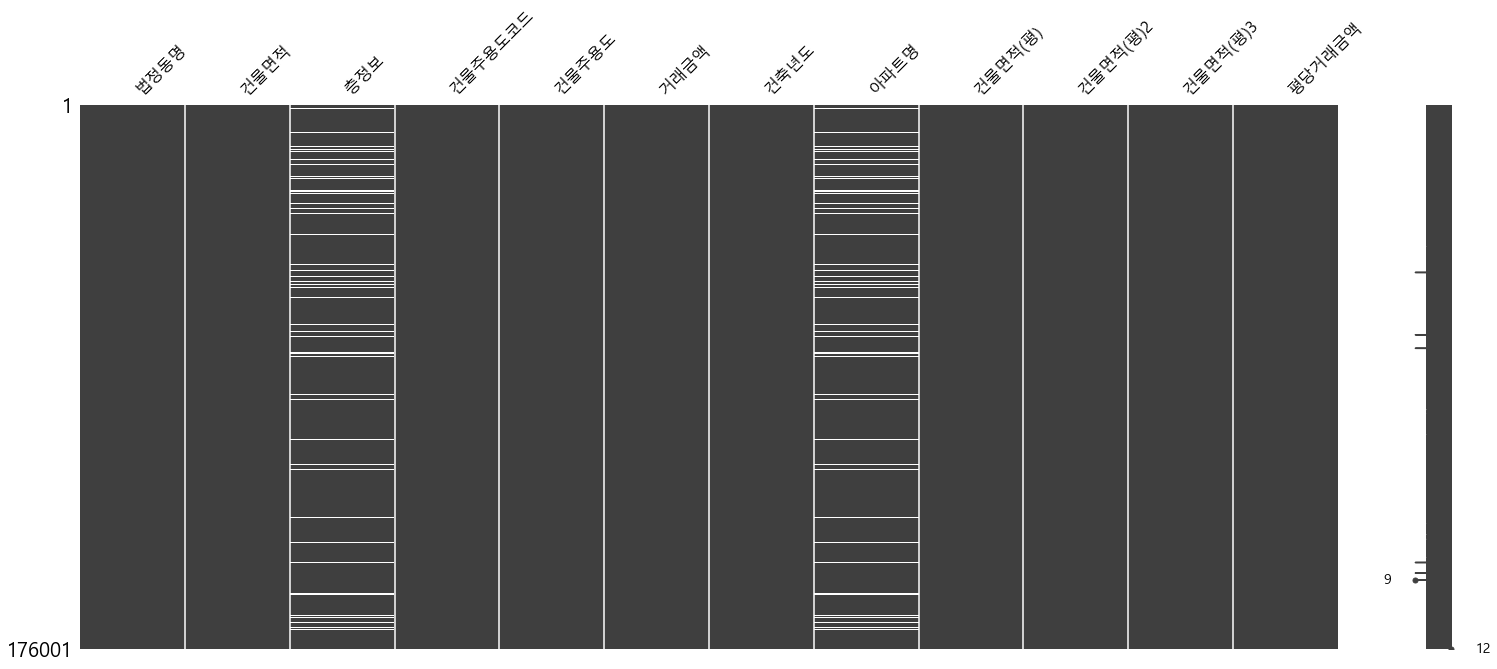

In [45]:
msno.matrix(apt2)
# msno.bar(apt2)

plt.show()

### 건물의 용도별 구분(아파트/단독주택/연립주택/오피스텔)

* 목적 
      - 2020년 건물의 용도별 거래량에 따라 수요가 많은 건물을 선택해서 분석하려 함

* 결과 
      - 아파트 거래량이 가장 높았음 

In [46]:
# 2020년  건물의 용도별 구분
df2.groupby(by=['건물주용도']).건물주용도.count()
#df2.groupby(by=['건물주용도']).거래금액.mean()

건물주용도
단독주택    12346
아파트     90666
연립주택    61702
오피스텔    15104
Name: 건물주용도, dtype: int64

In [47]:
# 2020년 건물의 용도별 거래금액 (구별)

df2.groupby(by=['시군구명','법정동명','건물주용도'])[['거래금액']].mean().sort_values(by='거래금액', ascending=False)

거래금액
시군구명 법정동명  건물주용도               
강남구  삼성동   단독주택   701939.000000
     청담동   단독주택   610000.000000
종로구  인사동   단독주택   602500.000000
서초구  서초동   단독주택   563263.636364
강남구  도곡동   단독주택   551690.375000
...                         ...
중구   장충동2가 아파트     10200.000000
노원구  월계동   오피스텔    10018.666667
서대문구 북가좌동  오피스텔     9333.333333
강서구  방화동   오피스텔     9254.854369
도봉구  쌍문동   오피스텔     8300.000000

[1233 rows x 1 columns]

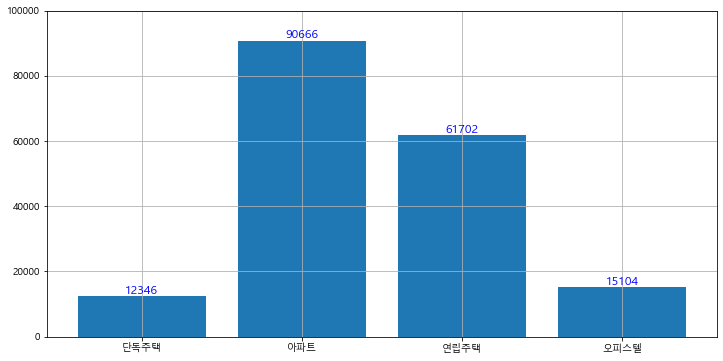

In [48]:
x = list(df2.groupby(by=['건물주용도'])['건물주용도'].count().index)
y = df2.groupby(by=['건물주용도'])['건물주용도'].count().values
plt.figure(figsize=(12,6))
plt.bar(x,y)
plt.ylim((0, 100000))
plt.grid()
for i, v in enumerate(x):
    plt.text(v, y[i], y[i], fontsize = 12, color='blue', horizontalalignment='center', verticalalignment='bottom')

plt.show()

### 지역구별 아파트 평당 거래 금액


* 목적 
      - 2020년 지역구에 따른 건물용도별 평당거래금액을 분석하려함 
      - 아파트, 전체, 아파트제외 순

* 결과 

    **아파트와 전체 비교** 
           
        평단거래금액 그래프의 양상이 거의 비슷함 
        → 아파트의 영향력이 높은 것을 알 수 있음

    **아파트와 비(非)아파트 비교**

        → 강남의 부촌 (서초구, 강남구) 
        서초,강남은 아파트 금액의 비중이 크다

        → 강북의 부촌 (용산구)
        용산구는 비아파트 금액의 비중이 크다
        




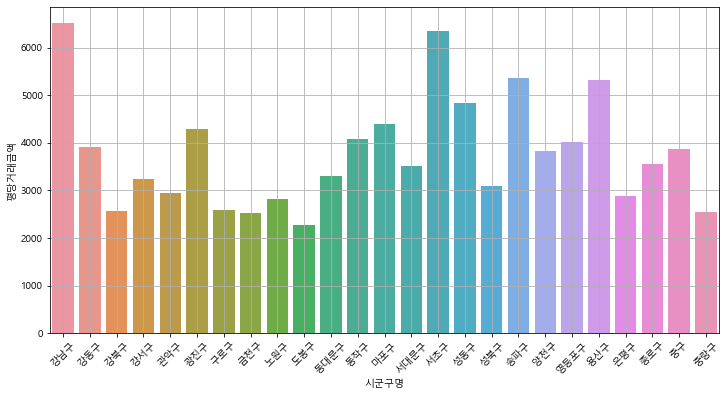

In [49]:
# 아파트만 추출
df3 = df2[df2['건물주용도'] == '아파트']

# 지역구 평당 거래 금액
val1 = df3.pivot_table(index='시군구명', values='평당거래금액')
plt.figure(figsize=(12,6))
sns.barplot(x=val1.index, y='평당거래금액', data=val1)
plt.xticks(rotation=45)
plt.grid()
plt.show()

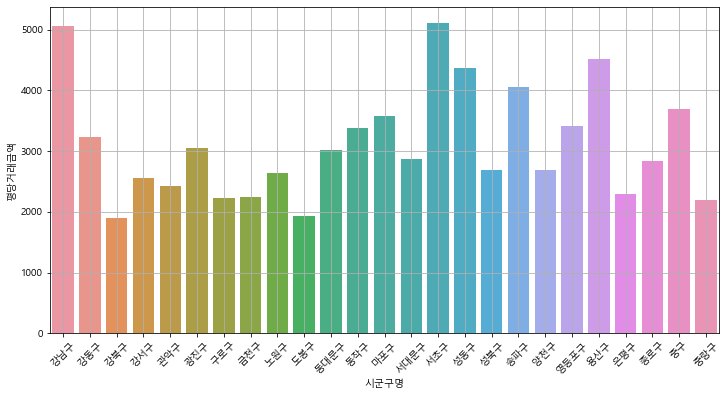

In [50]:
# 구별 평당거래금액

# plt.figure(figsize=(10,8))
# sns.barplot(x=df2['시군구명'].value_counts(),y=df2['평당거래금액'])
# plt.xticks(rotation=45)
# plt.grid()

val1 = df2.pivot_table(index='시군구명', values='평당거래금액')
plt.figure(figsize=(12,6))
sns.barplot(x=val1.index, y='평당거래금액', data=val1)
plt.xticks(rotation=45)
plt.grid()
plt.show()

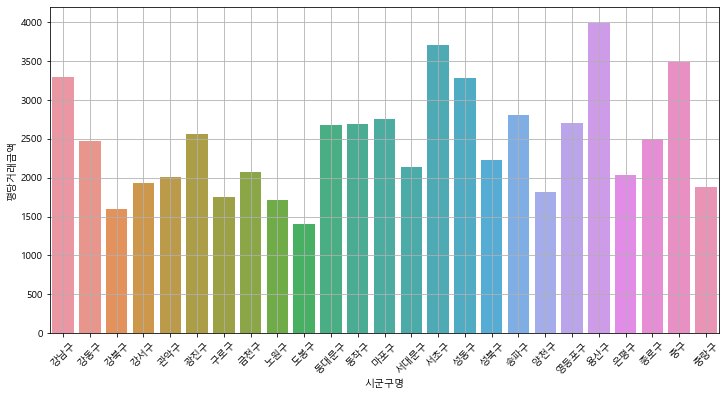

In [51]:
# 아파트만 제외
df4 = df2[df2['건물주용도'] != '아파트']

# 지역구 평당 거래 금액
val1 = df4.pivot_table(index='시군구명', values='평당거래금액')
plt.figure(figsize=(12,6))
sns.barplot(x=val1.index, y='평당거래금액', data=val1)
plt.xticks(rotation=45)
plt.grid()

In [52]:
# df2.sort_values(by=['시군구명', '건물면적(평)2'])
# df2.tail()

### 특정 구 지정, 동별 아파트 평당 거래 금액 및 평수별 거래금액

- **목적**

    - 아파트 거래금액 그래프에서 최고값(강남구)과 최저값(도봉구)을 비교
    
    - 강남구, 도봉구를 동 단위로 분석
    
<br>

- **결과**

    - **도봉구**
        - 강남구에 비해 동별간 차이가 없음
        - 그 중 쌍문동의 거래금액이 낮음
        
        <br>
        
    - **강남구**
        - 압구정동의 거래금액이 현저히 높음



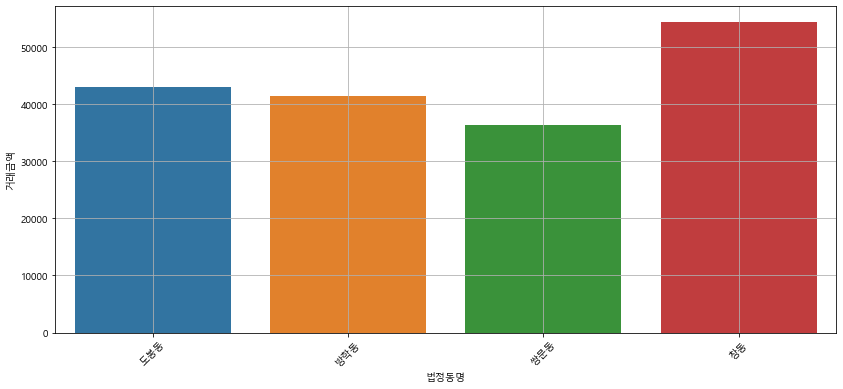

In [53]:
# 특정구를 지정하고 동별 평균 거래금액 그래프
# 도봉구 : 제일 저렴한 곳

df_a = df3[df3['시군구명']=='도봉구'].pivot_table(index='법정동명')
plt.figure(figsize=(14,6))
sns.barplot(x=df_a.index, y='거래금액', data=df_a)
plt.grid()
plt.xticks(rotation=45)
plt.show()


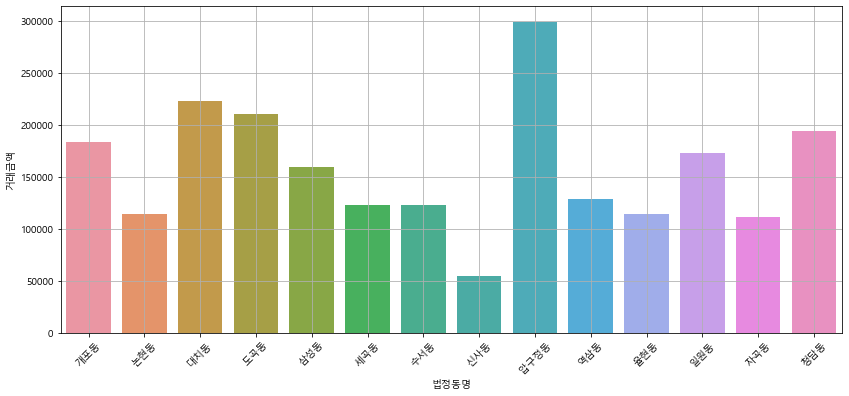

In [54]:
# 특정구를 지정하고 동별 평균 거래금액 그래프 
# 강남구 : 제일 비싼곳 

df_a = df3[df3['시군구명']=='강남구'].pivot_table(index='법정동명')
plt.figure(figsize=(14,6))
sns.barplot(x=df_a.index, y='거래금액', data=df_a)
plt.grid()
plt.xticks(rotation=45)
plt.show()

### 평수 별 아파트 거래 금액

- **목적**

    - 건물면적별 평당거래금액 차이분석
    
<br>

- **결과**

    - **도봉구**
        - 큰 평수로 갈수록 평당 가격이 떨어지는 추세를 볼 수 있었음 
        
        <br>
        
    - **강남구**
        - 강남구에 딱히 경향성이 없음
        → 평당 거래금액에 영향을 주는 요소가 너무 많음 (건축연도, 동네 차이 등등)

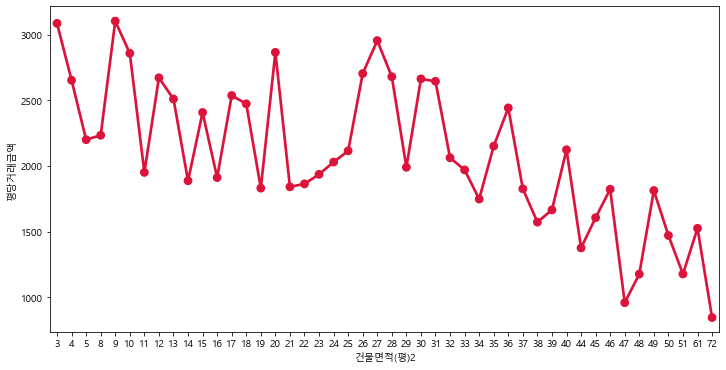

In [55]:
# 도봉구 범주화된 평수별 구별 가격


val2 = df3.pivot_table(index=['시군구명', '건물면적(평)2'], values='평당거래금액')
plt.figure(figsize=(12,6))
sns.pointplot(x=val2.loc['도봉구'].index, y=val2.loc['도봉구']['평당거래금액'], color = 'crimson')
plt.show()

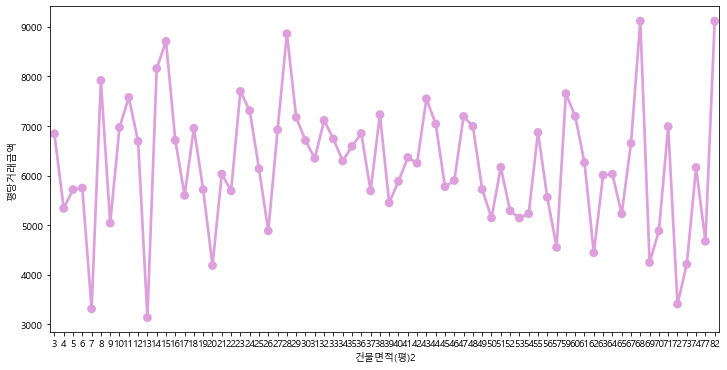

In [56]:
# 강남구 범주화된 평수별 구별 가격


val2 = df3.pivot_table(index=['시군구명', '건물면적(평)2'], values='평당거래금액')
plt.figure(figsize=(12,6))
sns.pointplot(x=val2.loc['강남구'].index, y=val2.loc['강남구']['평당거래금액'], color = 'plum')
plt.show()

In [57]:
# !pip install colorline

In [58]:
# import colorline

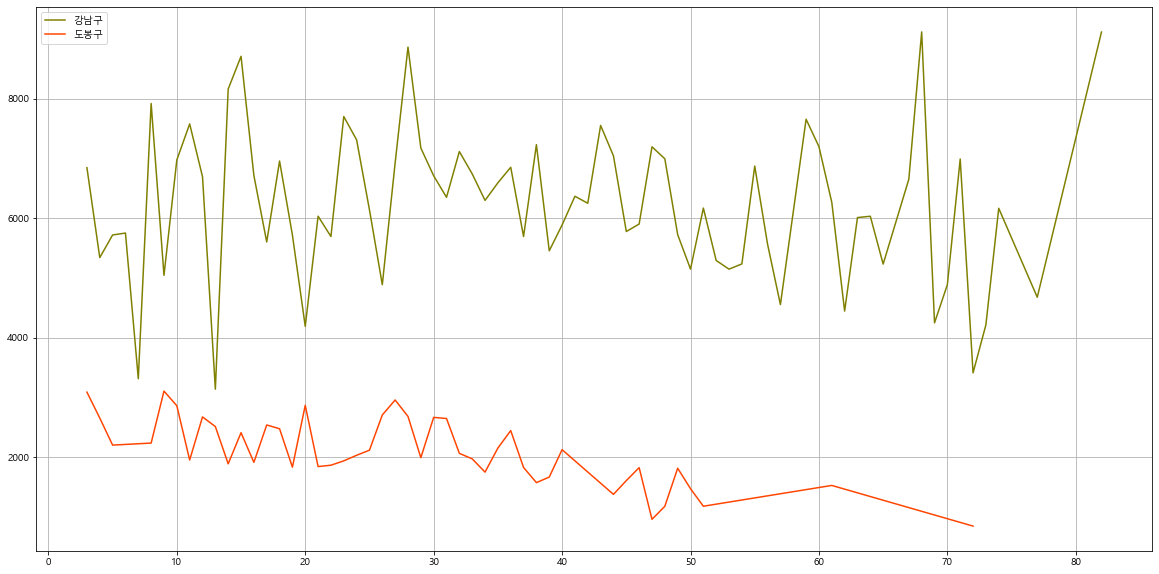

In [59]:


gu_ls = ['강남구','도봉구']

# 강남구, 도봉구 평수 별 거래 금액

val2 = df3.pivot_table(index=['시군구명', '건물면적(평)2'], values='평당거래금액')

plt.figure(figsize=(20,10))
color=['olive', 'orangered']


# sns.pointplot(x=val2.loc['서초구'].index, y=val2.loc['서초구']['평당거래금액'])
for j, i in enumerate(gu_ls) :
    plt.plot(val2.loc[i].index, val2.loc[i]['평당거래금액'],color=color[j])
# plt.colormaps(Set3)
plt.grid()
plt.legend(gu_ls)
plt.show()



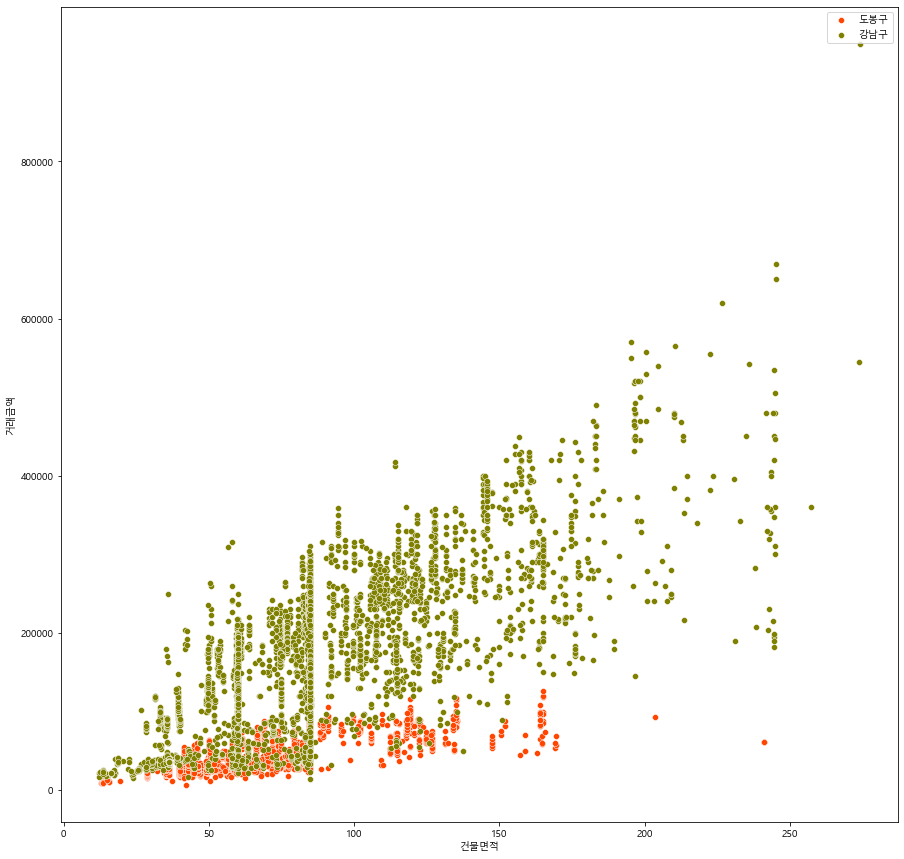

In [60]:
# '강남구','도봉구' 건물면적과 거래금액의 분포도 (거래량 파악)

plt.figure(figsize=(15,15))
sns.scatterplot(x='건물면적', 
                y='거래금액', 
                data=df3[df3.시군구명=='도봉구'],color='orangered')

sns.scatterplot(x='건물면적', 
                y='거래금액', 
                data=df3[df3.시군구명=='강남구'],color='olive')
plt.legend(['도봉구','강남구'])
plt.show()


### 지역구별 아파트 거래량

- **목적**

    - 서울시 내 구별 아파트 거래량 비교
    
<br>

- **결과**

    **외부데이터의 아파트 총 세대수와 비례함**
    
    <br>

    - **종로구**
        
        - 외부데이터의 아파트 총 세대수 또한 최저인 지역구
        - 아파트 자체가 적은 이유\
         →  용도 지역과 용도 지구가 복잡하게 지정되어 있고, 지구단위계획 결정 등으로 건축물 규제가 많음
        
        - ex 1. 한옥밀집지역(한옥지구) - 인사동, 익선동(각종 문화재 등이 곳곳에 자리하고 있음)
        - ex 2. 최고고도지구 - 평창동, 구기동(20m)
        * https://www.siminilbo.co.kr/news/newsview.php?ncode=1065591786400045
        - 창신동이 거주지역이 있는 곳으로 보여짐
        
        <br>
        
    - **노원구**
    
        - 10년째 거래량 25개 자치구 중 1위
        - 편리한교통(4호선, 7호선)
        - 우수한학군(중계동) 주거선호도 높음 
        - 개발호재로 투자관심 집중(GTX-C노선, 4호선 지하사업)
        * https://www.ekn.kr/web/view.php?key=526692
        - 상계동에 거주지역이 밀집 되어있음
        
        <br>
        
**※ 외부데이터 참고**

    서울시 공동주택 현황(유형별) 통계
    https://data.seoul.go.kr/dataList/11045/S/2/datasetView.do


In [61]:
df3 = df2[df2['건물주용도'] == '아파트']
df3.value_counts('시군구명')

시군구명
노원구     9404
강서구     6082
구로구     5172
송파구     5048
마포구     4705
성북구     4696
도봉구     4619
강동구     4582
강남구     4408
영등포구    3836
양천구     3819
은평구     3744
동대문구    3357
서초구     3329
성동구     3239
서대문구    3036
동작구     3033
중랑구     2942
관악구     2822
강북구     2282
금천구     1721
용산구     1577
광진구     1320
중구      1100
종로구      793
dtype: int64

In [62]:
data = pd.read_excel('../data/서울시 공동주택 현황(유형별) 통계.xlsx',header=1)
data.rename(columns={'단지수.1' : '아파트 단지수', '동수.1' : '아파트 동수', '세대수.1' : '아파트 세대수'}, inplace=True)
data = data[['구분','아파트 단지수', '아파트 동수', '아파트 세대수']]
data.sort_values(by=['아파트 세대수'], ascending=True, inplace = True)
data.head()


,구분,아파트 단지수,아파트 동수,아파트 세대수
1,종로구,33,138,10625
2,중구,35,172,12819
9,강북구,50,339,25063
5,광진구,84,296,25065
18,금천구,74,277,25785


In [63]:
data.tail()

,구분,아파트 단지수,아파트 동수,아파트 세대수
16,강서구,296,1262,101324
23,강남구,240,1352,106985
24,송파구,164,1329,110500
11,노원구,220,1369,134990
0,합계,3454,18077,1435821


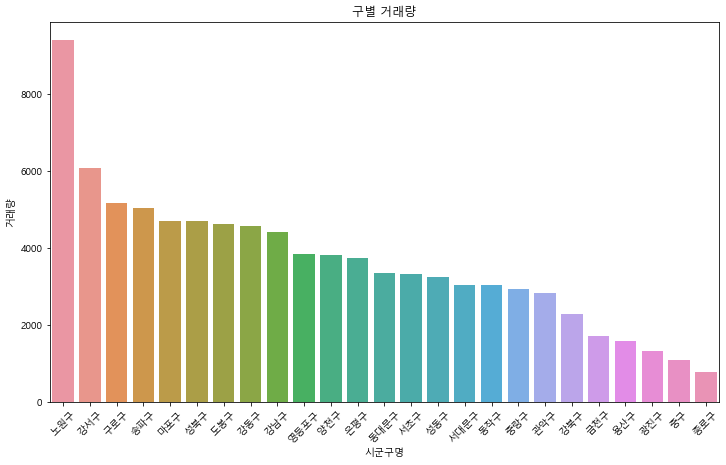

In [64]:
# 아파트만 추출해서 구별 거래량

df3 = df2[df2['건물주용도'] == '아파트']

plt.figure(figsize=(12,7))
sns.barplot(x = df3.value_counts('시군구명').index, y= df3.value_counts('시군구명').values)
plt.xticks(rotation=45)
plt.title('구별 거래량')
plt.ylabel('거래량')
plt.show()


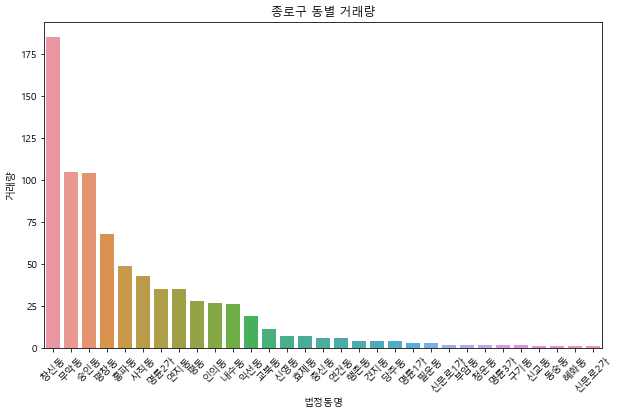

In [65]:
# 종로구 동별 거래량
plt.figure(figsize=(10,6))
volumn1 = df3[df3['시군구명'] == '종로구'].value_counts('법정동명')
sns.barplot(x=volumn1.index, y=volumn1.values)
plt.ylabel('거래량')
plt.title('종로구 동별 거래량')
plt.xticks(rotation=45)
plt.show()


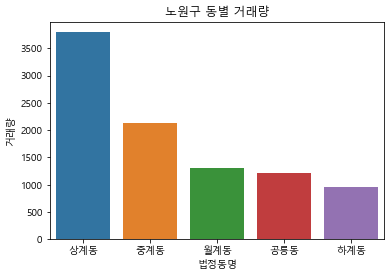

In [66]:
# 노원구 동별 거래량
volumn1 = df3[df3['시군구명'] == '노원구'].value_counts('법정동명')
sns.barplot(x=volumn1.index, y=volumn1.values)
plt.ylabel('거래량')
plt.title('노원구 동별 거래량')
plt.show()


In [87]:
# sns.scatterplot(x='건물면적', 
#                 y='거래금액', 
#                 hue='아파트명', # different colors by group
# #                 style='건물면적(평)3', # different shapes by group
# #                 s=2, # marker size
#                 data=df3[df3.시군구명=='강남구'])
# plt.figure(figsize=(14,14))
# plt.show()


### 특정 구 (강남, 노원) 건축년도 별 아파트 금액 비교

- **목적**

    - 특정 구의 건축년도에 따른 아파트의 금액을 비교
    - 평당거래금액이 높은 강남, 거래량이 높은 노원 비교

<br>

- **결과**


        - 일정 기간 기점으로 신축에 수요가 높아지는 양상을 보인다.
        - 수요가 높은 구축 아파트의 경우 재개발 투자로 인해 높은 양상을 보인다.



In [68]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib.pyplot as plt

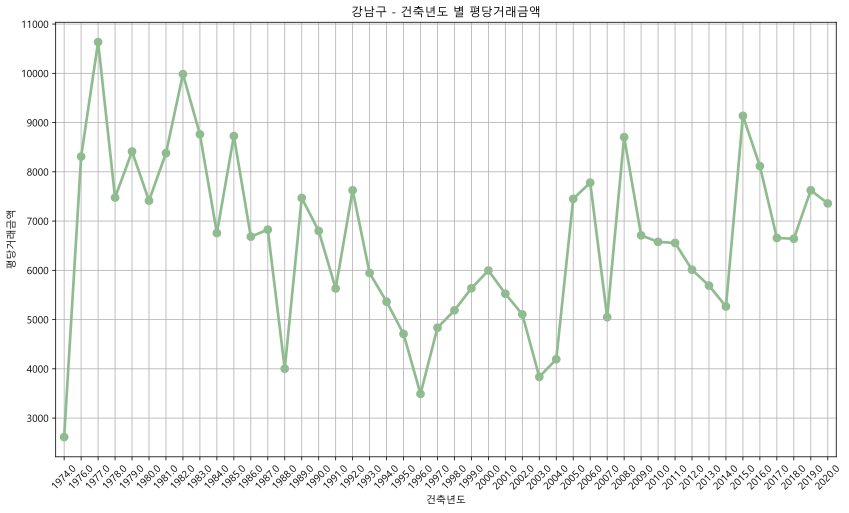

In [69]:
# 강남구 - 건축년도 별 평당 거래금액
v3 = df3[df3['시군구명'] == '강남구'].pivot_table(index='건축년도', values='평당거래금액')
plt.figure(figsize=(14,8))
sns.pointplot(x=v3.index[1:], y=v3['평당거래금액'][1:], data=v3, color = 'darkseagreen')
plt.grid()
plt.xticks(rotation=45)
plt.title('강남구 - 건축년도 별 평당거래금액')
plt.show()


In [113]:
v3 = df3[df3['시군구명'] == '강남구'].pivot_table(index='건축년도', values='평당거래금액')
x = np.array(v3.index[1:])
y = np.array(v3['평당거래금액'][1:])
z = np.polyfit(x,y,3)
p = np.poly1d(z)
xp = np.linspace(1975, 2022, 1000)

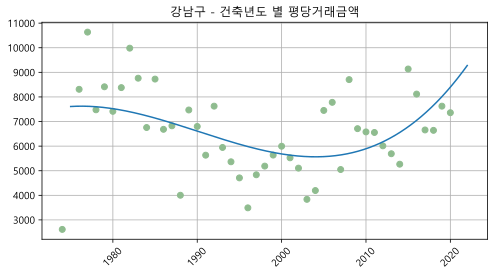

In [114]:
# 강남구 - 건축년도 별 평당 거래금액
v3 = df3[df3['시군구명'] == '강남구'].pivot_table(index='건축년도', values='평당거래금액')
x = v3.index[1:]
plt.figure(figsize=(8,4))
plt.plot(v3.index[1:], v3['평당거래금액'][1:], 'o', color = 'darkseagreen')
plt.plot(xp,p(xp))
plt.grid()
plt.xticks(rotation=45)
plt.title('강남구 - 건축년도 별 평당거래금액')
plt.show()



In [71]:
df3[df3.시군구명=='강남구'][df3['건축년도']==1974.0]


<ipython-input-71-1c745a24ad7c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3[df3.시군구명=='강남구'][df3['건축년도']==1974.0]


,법정동명,건물면적,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명,건물면적(평),건물면적(평)2,건물면적(평)3,평당거래금액,시도명,시군구명
132047,신사동,130.61,6.0,2001,아파트,99000.0,1974.0,강남상가,39.51,39,"(35, 40]",2538.461538,서울특별시,강남구
132103,신사동,103.44,4.0,2001,아파트,85000.0,1974.0,강남상가,31.29,31,"(30, 35]",2741.935484,서울특별시,강남구
132177,신사동,143.01,5.0,2001,아파트,112000.0,1974.0,강남상가,43.26,43,"(40, 45]",2604.651163,서울특별시,강남구
132227,신사동,145.59,6.0,2001,아파트,110000.0,1974.0,강남상가,44.04,44,"(40, 45]",2500.000000,서울특별시,강남구
132307,신사동,63.31,4.0,2001,아파트,51000.0,1974.0,강남상가,19.15,19,"(15, 20]",2684.210526,서울특별시,강남구


In [72]:
# !pip install IPython

**상가영업으로 인해  재개발 어려움**

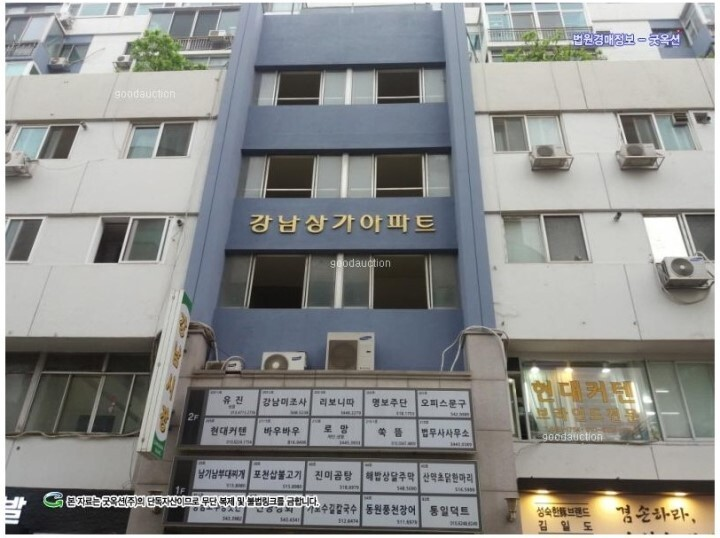

In [116]:
from IPython.display import Image
Image("..\\data\\강남상가.jpg")
# Image("C:\\encore_hr\\py_workspace\\data\\강남상가.jpg")
# Image("C:\\Users\\hyeri\\Downloads\\강남상가.jpg")

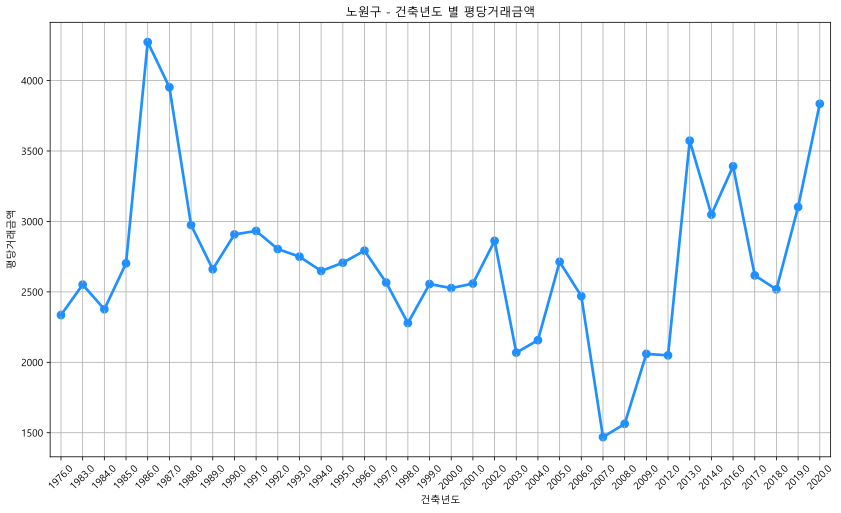

In [74]:

# 노원구 - 건축년도 별 평당 거래금액
v2 = df3[df3['시군구명'] == '노원구'].pivot_table(index='건축년도', values='평당거래금액')
plt.figure(figsize=(14,8))
sns.pointplot(x=v2.index[1:], y=v2['평당거래금액'][1:], data=v2, color = 'dodgerblue')
plt.grid()
plt.xticks(rotation=45)
plt.title('노원구 - 건축년도 별 평당거래금액')
plt.show()



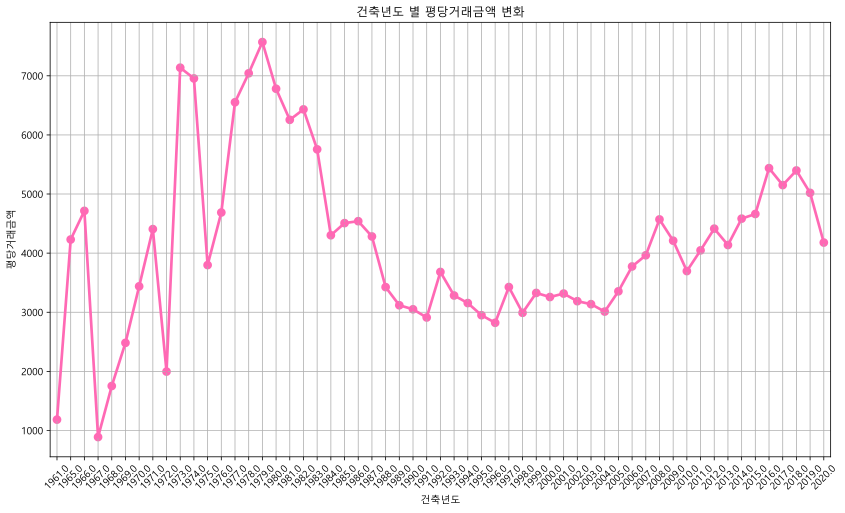

In [75]:
v1 = df3.pivot_table(index='건축년도', values='평당거래금액')
plt.figure(figsize=(14,8))
sns.pointplot(x=v1.index[1:], y=v1['평당거래금액'][1:], data=v1, color = 'hotpink')
plt.grid()
plt.xticks(rotation=45)
plt.title('건축년도 별 평당거래금액 변화')
plt.show()



In [76]:
# plt.plot (means)
# plt.fill_between(range(6),means-stds,means+stds,alpha=.1)

### 아파트 브랜드 별 거래량 

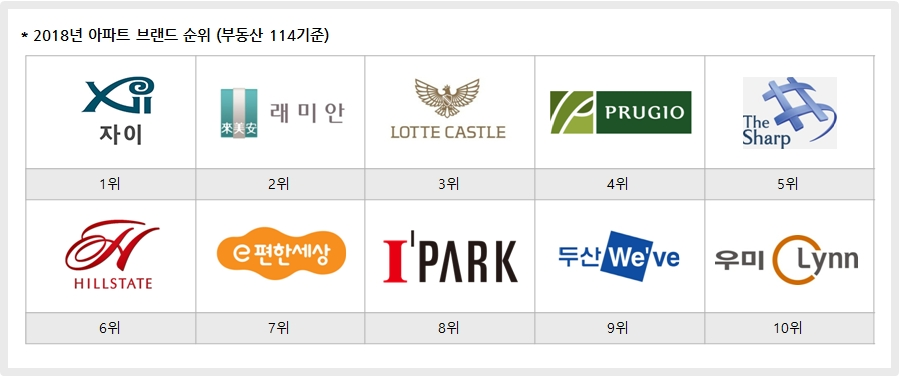

In [115]:
Image("..\\data\\아파트브랜드.png")

- **목적**

    - 브랜드별 선호도별 거래량을 비교하기 위함
    
<br>

- **결과**

    - 래미안, 자이, 롯데캐슬의 선호도가 높으면서 거래량 또한 높은 것을 알 수 있다. 
    - 19년, 20년 비슷한 양상을 보이고 있다.



<function matplotlib.pyplot.show(close=None, block=None)>

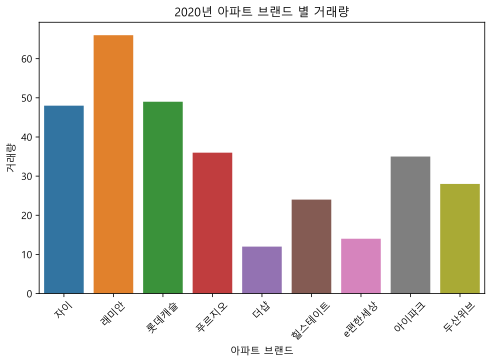

In [78]:
idx = np.arange(5836)
val = list(df3['아파트명'].unique())
zzz = pd.DataFrame(val, index=idx)
null_ls = []
for i in range(len(zzz[0])) :
    if zzz[0][i].isalpha() :
        null_ls.append(zzz[0][i]) 
    else :
        pass
null_ls = sorted(null_ls)
# 2018년도 아파트 브랜드 순위
# 자이, 래미안, 롯데캐슬, 푸르지오, 더샾, 힐스테이트, e편한세상, 아이파크, 두산위브, 우미
apt_rank = ['자이', '래미안', '롯데캐슬', '푸르지오', '더샵', '힐스테이트', 'e편한세상', '아이파크', '두산위브']
c1, c2, c3,c4,c5,c6,c7,c8,c9 = 0,0,0,0,0,0,0,0,0
ls = []
for i in range(len(null_ls)) :
    if '자이' in null_ls[i] :
        c1 += 1
    elif '래미안' in null_ls[i] :
        c2 += 1
    elif '롯데' in null_ls[i] :
        c3 += 1
    elif '푸르지오' in null_ls[i] :
        c4 += 1
    elif '더샵' in null_ls[i] :
        c5 += 1
    elif '힐스테이트' in null_ls[i] :
        c6 += 1
    elif '편한세상' in null_ls[i] :
        c7 += 1
    elif '아이파크' in null_ls[i] :
        c8 += 1
    elif '두산' in null_ls[i] :
        c9 += 1

count_ls = [c1, c2, c3,c4,c5,c6,c7,c8,c9]
new_df = pd.DataFrame(count_ls, index=apt_rank)
plt.figure(figsize=(8,5))
sns.barplot(x=new_df.index, y=new_df[0], data=new_df)
plt.ylabel('거래량')
plt.xlabel('아파트 브랜드')
plt.title('2020년 아파트 브랜드 별 거래량')
plt.xticks(rotation=45)
plt.show

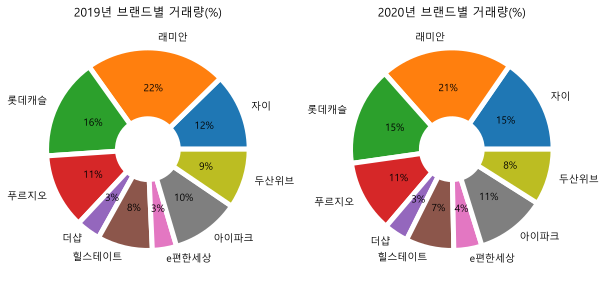

<Figure size 432x288 with 0 Axes>

In [79]:
idx1 = np.arange(5014)
val1 = list(df1['아파트이름'].unique())
zzz1 = pd.DataFrame(val1, index=idx1)
null_ls1 = []
for i in range(len(zzz1[0])) :
    if zzz1[0][i].isalpha() :
        null_ls1.append(zzz1[0][i]) 
    else :
        pass
null_ls1 = sorted(null_ls1)
# 2018년도 아파트 브랜드 순위
# 자이, 래미안, 롯데캐슬, 푸르지오, 더샾, 힐스테이트, e편한세상, 아이파크, 두산위브, 우미
apt_rank = ['자이', '래미안', '롯데캐슬', '푸르지오', '더샵', '힐스테이트', 'e편한세상', '아이파크', '두산위브']
c1, c2, c3,c4,c5,c6,c7,c8,c9 = 0,0,0,0,0,0,0,0,0
ls = []
for i in range(len(null_ls1)) :
    if '자이' in null_ls1[i] :
        c1 += 1
    elif '래미안' in null_ls1[i] :
        c2 += 1
    elif '롯데' in null_ls1[i] :
        c3 += 1
    elif '푸르지오' in null_ls1[i] :
        c4 += 1
    elif '더샵' in null_ls1[i] :
        c5 += 1
    elif '힐스테이트' in null_ls1[i] :
        c6 += 1
    elif '편한세상' in null_ls1[i] :
        c7 += 1
    elif '아이파크' in null_ls1[i] :
        c8 += 1
    elif '두산' in null_ls1[i] :
        c9 += 1
count_ls1 = [c1, c2, c3,c4,c5,c6,c7,c8,c9]

new_df = pd.DataFrame(count_ls, index=apt_rank)
plt.figure(figsize=(10,6))
x = new_df[0].values
y = list(new_df.index)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

new_df1 = pd.DataFrame(count_ls1, index=apt_rank)
x1 = new_df1[0].values
y1 = list(new_df1.index)



plt.subplot(1,2,1)
plt.title('2019년 브랜드별 거래량(%)')
plt.pie(x1, labels=y1, autopct='%d%%', wedgeprops=wedgeprops)

plt.subplot(1,2,2)
plt.title('2020년 브랜드별 거래량(%)')
plt.pie(x, labels=y, autopct='%d%%', wedgeprops=wedgeprops)
plt.show()


# new_df1 = pd.DataFrame(count_ls1, index=apt_rank)
# plt.figure(figsize=(12,6))
# plt.subplot(1,2,1)
# sns.barplot(x=new_df1.index, y=new_df1[0], data=new_df1)
# plt.ylabel('거래량')
# plt.xlabel('아파트 브랜드')
# plt.title('2019년 아파트 브랜드 별 거래량')
# plt.xticks(rotation=45)
# plt.subplot(1,2,2)
# sns.barplot(x=y, y=x, data=new_df)
# plt.ylabel('거래량')
# plt.xlabel('아파트 브랜드')
# plt.title('2020년 아파트 브랜드 별 거래량')
# plt.xticks(rotation=45)
# plt.tight_layout()


plt.subplots_adjust(wspace=0.4)
plt.show()


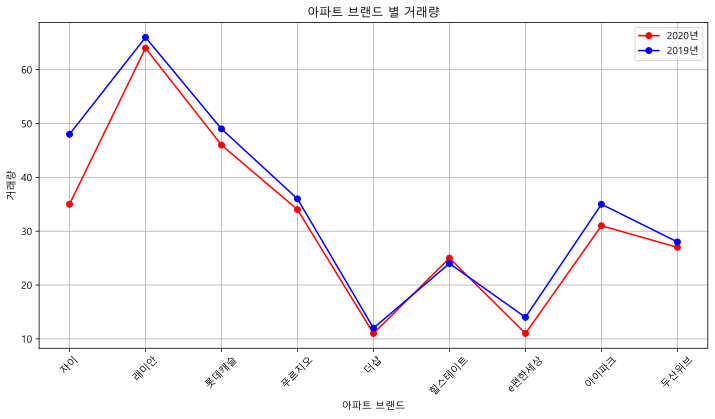

In [80]:
plt.figure(figsize=(12,6))

plt.plot(new_df1.index, new_df1[0], '-or')
plt.plot(y, x,'-ob')
plt.grid()
plt.ylabel('거래량')
plt.xlabel('아파트 브랜드')
plt.title('아파트 브랜드 별 거래량')
plt.legend(['2020년', '2019년'])
plt.xticks(rotation=45)
plt.show()


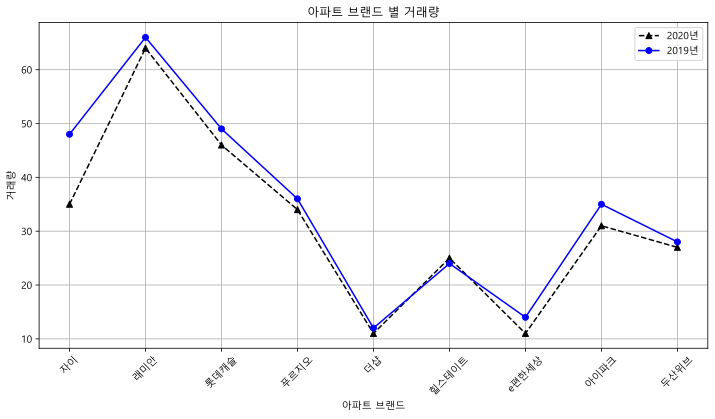

In [81]:
new_df = pd.DataFrame(count_ls, index=apt_rank)
new_df1 = pd.DataFrame(count_ls1, index=apt_rank)

plt.figure(figsize=(12,6))

plt.plot(new_df1.index, new_df1[0], '--^k')
plt.plot(list(new_df.index), new_df[0].values,'-ob')
plt.grid()
plt.ylabel('거래량')
plt.xlabel('아파트 브랜드')
plt.title('아파트 브랜드 별 거래량')
plt.legend(['2020년', '2019년'])
plt.xticks(rotation=45)
plt.show()

# ^ : 삼각형
# k : 검정색 (b(blue)랑 구분 가능!)

### 2019년 기준 아파트 거래일자 관련한 분석

- **목적**

    - 2019년 자료를 통해 거래일자를 확인 할 수 있음
    - 거래일자 관련해 언제 거래량이 증가했는지 비교 

<br>

- **결과**


    - 10-11월의 거래량이 가장 높은 것을 알 수 있음 (ex, 학년 시작 전)
    - 여름, 겨울에는 거래량이 낮아짐



In [82]:
temp = df1.loc[:,['거래년도','거래월','거래일자']]
temp.columns = ['year','month','day']
df1['거래날짜'] = pd.to_datetime(temp)
df1

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,반기,분기,평당거래금액,시도명,시군구명,거래날짜
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,10,9,29.53,29,"(25, 30]",상반기,1분기,3620.689655,서울특별시,종로구,2019-01-07
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11,9-1,49.40,49,"(45, 50]",상반기,1분기,3306.122449,서울특별시,종로구,2019-01-11
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,13,9,39.76,39,"(35, 40]",상반기,1분기,3051.282051,서울특별시,종로구,2019-01-19
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,1,9,44.56,44,"(40, 45]",상반기,1분기,2704.545455,서울특별시,종로구,2019-01-30
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,14,73,45.52,45,"(40, 45]",상반기,1분기,3555.555556,서울특별시,종로구,2019-01-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11,164-70,4.08,4,"(0, 5]",하반기,4분기,3625.000000,서울특별시,강동구,2019-12-30
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,9,695,25.57,25,"(20, 25]",하반기,4분기,3190.000000,서울특별시,강동구,2019-12-07
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,4,668,25.63,25,"(20, 25]",하반기,4분기,3112.000000,서울특별시,강동구,2019-12-09
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,3,686,25.66,25,"(20, 25]",하반기,4분기,3200.000000,서울특별시,강동구,2019-12-25


In [83]:
df1.isnull().sum()

건축년도        0
거래년도        0
거래월         0
거래일자        0
법정동         0
거래금액        0
아파트이름       0
전용면적        0
층           0
지번          0
전용면적(평)     0
전용면적(평)2    0
전용면적(평)3    0
반기          0
분기          0
평당거래금액      0
시도명         0
시군구명        0
거래날짜        0
dtype: int64

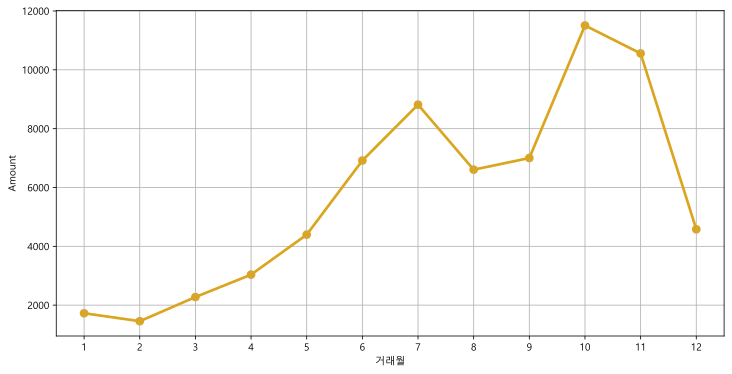

In [84]:
temp = df1.groupby(by=['거래월'])['평당거래금액'].agg(['count'])
temp

plt.figure(figsize=(12,6))
sns.pointplot(x=temp.index, y='count',data=temp, color = 'goldenrod')
plt.grid()
plt.ylabel('Amount')
plt.show()


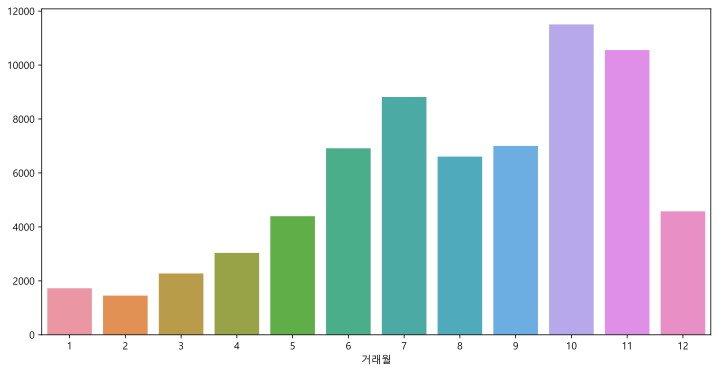

In [85]:
# 거래월별 거래량 비교

# df1.value_counts('거래월').plot(kind='bar')

plt.figure(figsize=(12,6))
sns.barplot(x=df1.value_counts('거래월').sort_index().index, y=df1.value_counts('거래월').sort_index().values)
plt.show()


# 분석결과

◎ 추출한 각 데이터의 최대값, 최소값을 집중 분석<br> 
◎ 도메인지식에 대한 심층적 접근 (부동산 전문가 자문)


- **Best Practice**

    * 지역구별 아파트 거래량
    
    - 외부데이터(서울시 공동주택 현황(유형별) 통계)를 통해 신뢰도를 높일 수 있었다.


<br>

- **Lesson Learned**

    * 아파트 브랜드 별 거래량
    
    - 신뢰도 있는 외부데이터의 부재
    - 지역 내 아파트 브랜드별 공급량 데이터 부실
    - 데이터상 아파트명의 통일성 부족(동일한 브랜드명으로 되어있지 않음)으로 내용 추출의 어려움

